In [26]:
%matplotlib inline
import matplotlib as mpl
mpl.style.use('/Users/nik/Dropbox/Notebooks/thesisrc.py')
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import pandas as pd
import lvdatatools as lvdt

# SCF72 -- 4K DATA

In [6]:
data_dir = '/Volumes/EDDropbox/Data/SCF72/4K/'
fig_dir =  '/Volumes/EDDropbox/Data/SCF72/figures/'
os.chdir(data_dir)

In [156]:
# filelist = glob.glob(data_dir+'*.bin')
# filelist.sort(key=lambda f: f[len(data_dir):-4].lower())
# for f in filelist:
#     print '\'{0}\''.format(f[len(data_dir):]), '{:0.1f}MB'.format(os.path.getsize(f)/1e6)

### Leads 23-21

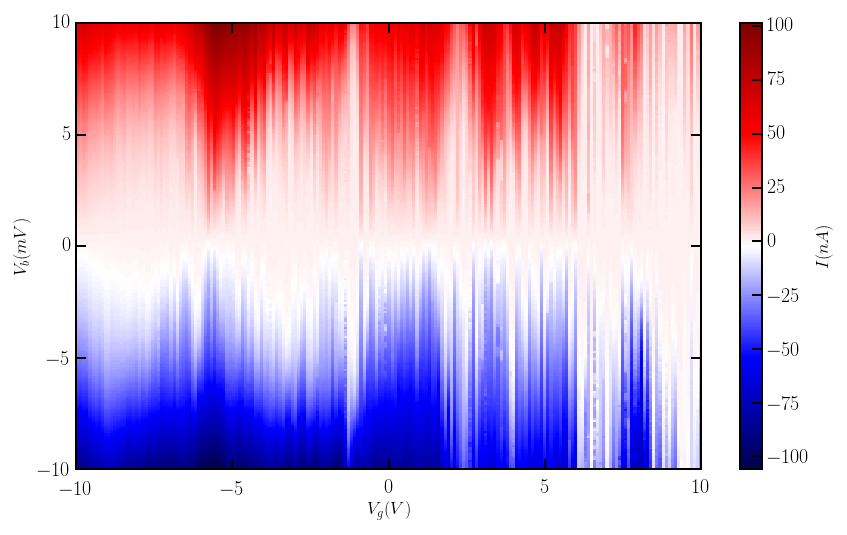

In [13]:
# this was all done the old way, without the lvdt package I wrote later
# stick with it for now

f = os.path.join(data_dir,'VI-gate_23-21_13_b.bin')
data = np.fromfile(f, '>d')
data = data.reshape((-1, data[0]))
bias = data[0,1:]
gate = data[1:,0]
current = data[1:,1:]

n = data[0,0]
avgcurrent = (np.append(current[:,3*n/4 - 1:n-2],current[:,0:n/4], axis=1) + current[:,n/4:3*n/4 - 1][:,::-1])/2
avgcurrent = avgcurrent.transpose()

fig = plt.figure(figsize = (14,8))
ax = fig.add_subplot(1,1,1)
im = ax.imshow(avgcurrent*1e9, extent = [-10,10,-10,10], origin = 'lower', aspect = 'auto',
          cmap = plt.cm.seismic, interpolation = 'nearest')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
cb = plt.colorbar(im)
cb.set_label(r'$I (nA)$')
fig.savefig(os.path.join(fig_dir,'VI-gate_23-21_13_b.pdf'), format='pdf', dpi=300)

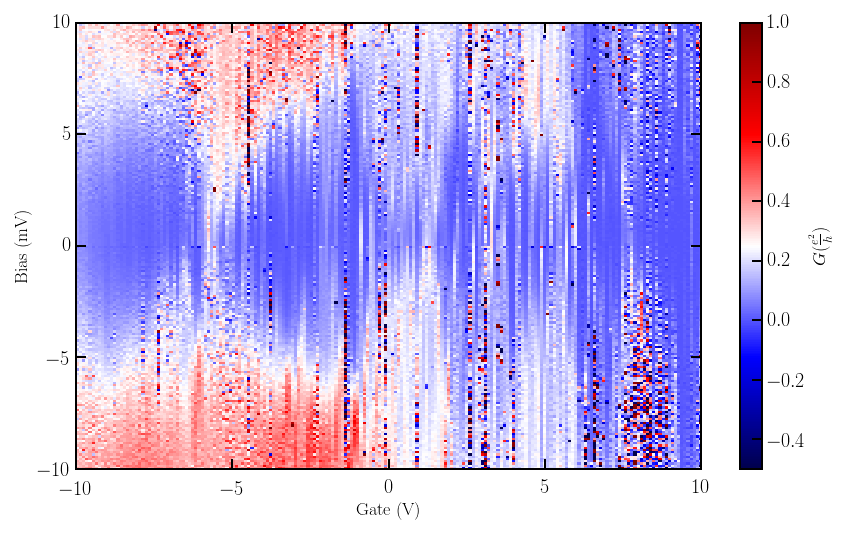

In [21]:
cond = np.diff(avgcurrent, axis = 0)/100e-6/3.875e-5
# cond_avg = np.average(cond)
# cond_std = np.std(cond)

fig = plt.figure(figsize = (14,8))
ax = fig.add_subplot(1,1,1)
im = ax.imshow(cond, extent = [-10,10,-10,10], origin = 'lower', aspect = 'auto',
          cmap = plt.cm.seismic, interpolation = 'nearest', vmin=-0.5, vmax=1)
ax.set_xlabel('Gate (V)')
ax.set_ylabel('Bias (mV)') 
cb = plt.colorbar(im)
cb.set_label(r'$G (\frac{e^2}{h})$')

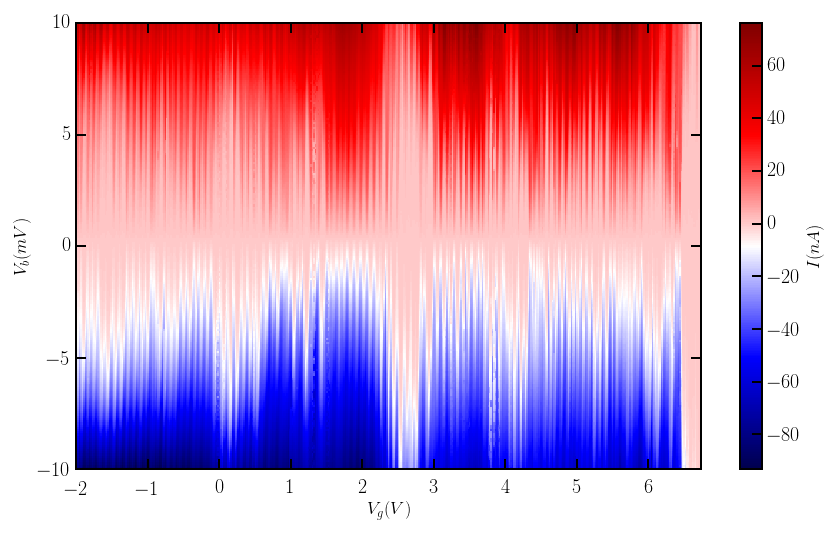

In [43]:
# this is missing the .txt file to match
# do it the hard way

f = os.path.join(data_dir,'VI-gate_23-21_13_f.bin')

data = np.fromfile(f,'>d')
data = data.reshape((-1, data[0]))
data = data.byteswap().newbyteorder()
data = data.transpose()
df = pd.DataFrame(data[1:, 1:], index=data[1:, 0], columns=data[0, 1:])
df.columns.name = 'gate'
df.index.name = 'bias'
df.index = df.index*1000
df = df.groupby(df.index).mean()

fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(1,1,1)
limits = [df.columns[0], df.columns[-3],df.index[0],df.index[-1]]
im = ax.imshow(df.iloc[:,:-2]*1e9, extent = limits, 
               cmap = plt.cm.seismic,
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
cb = plt.colorbar(im)
cb.set_label(r'$I (nA)$')
# fig.savefig(os.path.join(fig_dir,'VI-gate_23-21_13_f.pdf'), format='pdf', dpi=300)

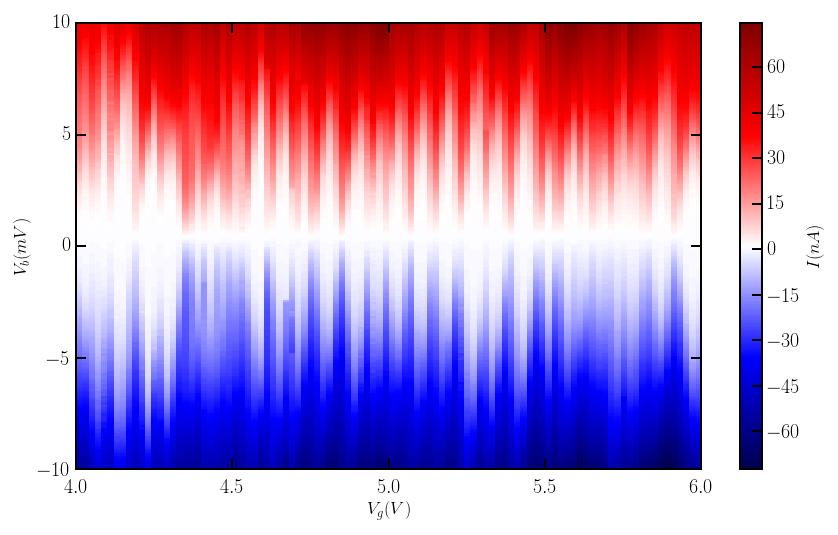

In [44]:
# zoom in a little to look at the resolution

fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(1,1,1)
limits = [df.columns[300], df.columns[400],df.index[0],df.index[-1]]
im = ax.imshow(df.iloc[:,300:400]*1e9, extent = limits, 
               cmap = plt.cm.seismic,
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
cb = plt.colorbar(im)
cb.set_label(r'$I (nA)$')
# fig.savefig(os.path.join(fig_dir,'VI-gate_23-21_13_f.pdf'), format='pdf', dpi=300)

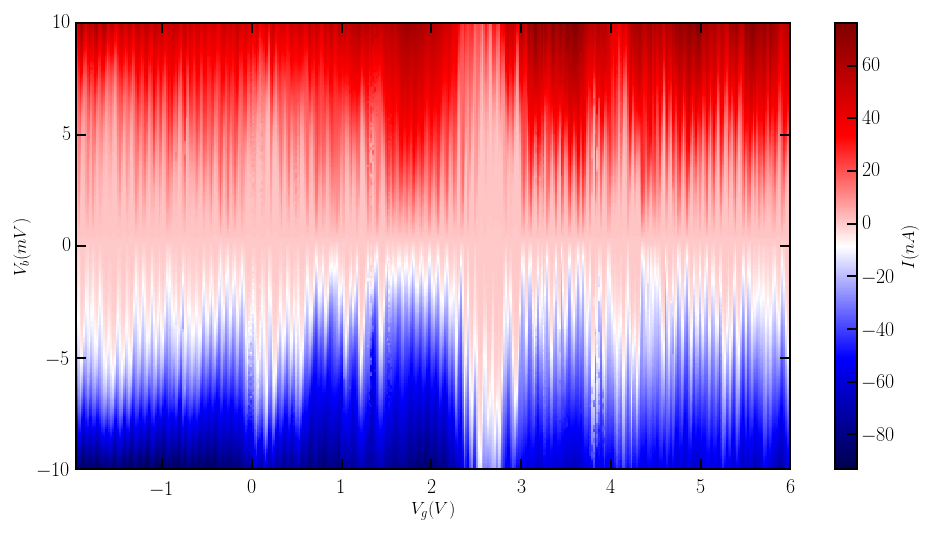

In [46]:
# average over some gate values and plot again

df_roll = pd.rolling_mean(df,3, axis=1)

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,1,1)
limits = [df.columns[2], df.columns[400],df.index[0],df.index[-1]]
im = ax.imshow(df.iloc[:,2:400]*1e9, extent = limits, 
               cmap = plt.cm.seismic,
               origin = 'lower', aspect = 'auto', interpolation = 'None')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
cb = plt.colorbar(im)
cb.set_label(r'$I (nA)$')
fig.savefig(os.path.join(fig_dir,'VI-gate_23-21_13_f.pdf'), format='pdf', dpi=300)

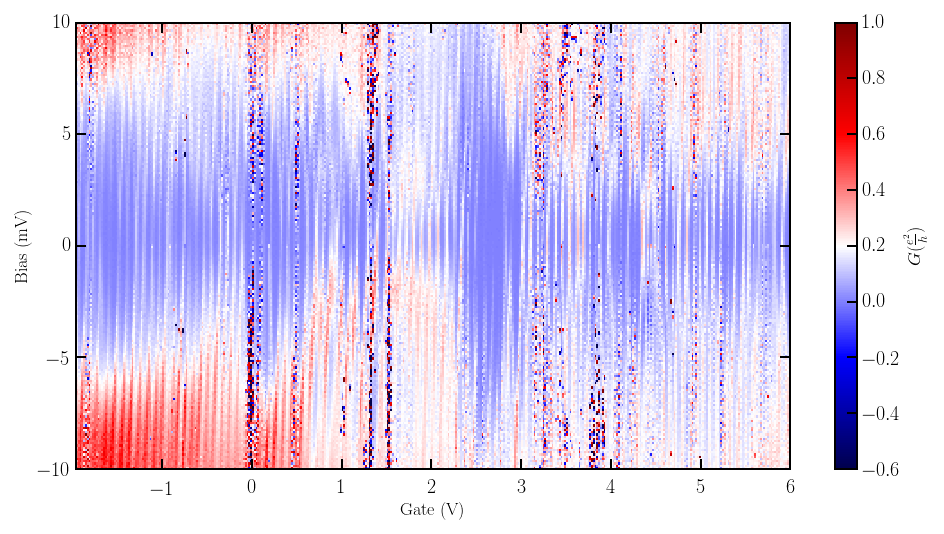

In [51]:
cond = df.diff()/100e-6/3.875e-5

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,1,1)
limits = [cond.columns[2], cond.columns[400],cond.index[0],cond.index[-1]]
im = ax.imshow(cond.iloc[1:,2:400], extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.6, vmax = 1.0, 
               origin = 'lower', aspect = 'auto', interpolation = 'None')
ax.set_xlabel('Gate (V)')
ax.set_ylabel('Bias (mV)') 
cb = plt.colorbar(im)
cb.set_label(r'$G (\frac{e^2}{h})$')
fig.savefig(os.path.join(fig_dir,'VI-gate_23-21_13_f_cond.pdf'), format='pdf', dpi=300)

### Leads 17-19

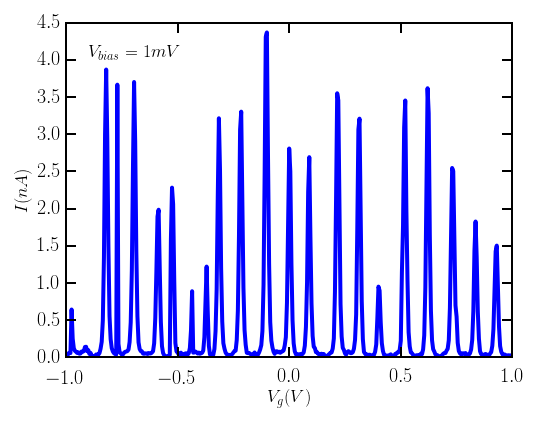

In [98]:
# apparently this gate sweep file is messed up
# here is a simple plot that shows some of the behavior

f = os.path.join(data_dir,'gate-swp_17-29_13_b.bin')
df = lvdt.get_data_2d(f)
df['Iavg'] = df['Iavg']*1e9 + 0.6 # correct offset

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.plot(df.Gate[200:602],df.Iavg[200:602])
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$I (nA)$')
# ax.set_title('gate-swp_17-29_13_b'+'_one')
ax.text(-0.9,4.0,r'$V_{bias}=1mV$', fontsize=18)

In [123]:
# now try to get more data out of that same file

data = np.fromfile(f,'>d')
data_two = data[4818:]
data_two = data_two.reshape((-1,data_two[0]))
data_two = data_two.byteswap().newbyteorder()
columns = ['Size','Gate','Iavg','Istd','t0','dt']
columns.extend(['I'+str(x) for x in range(int(data_two[0,0]-6))])
df_two = pd.DataFrame(data_two, columns=columns)

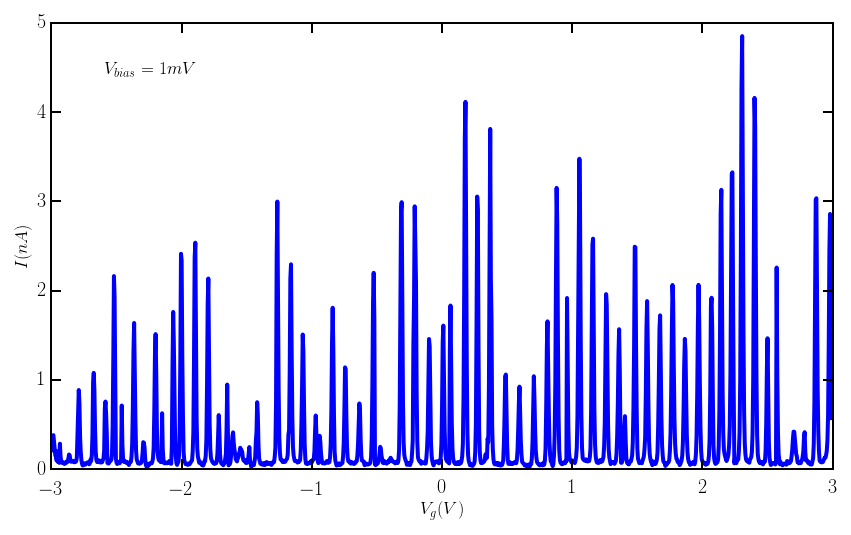

In [125]:
# add column for sweep direction
# plot only down sweep

df_two['dir'] = (df_two['Gate']-df_two['Gate'].shift()).fillna(0)
df_plt = df_two[df_two['dir']<0]

fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(1,1,1)
ax.plot(df_plt['Gate'], df_plt['Iavg']*1e9+0.6)
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$I (nA)$')
ax.text(-2.6,4.4,r'$V_{bias}=1mV$', fontsize=18)

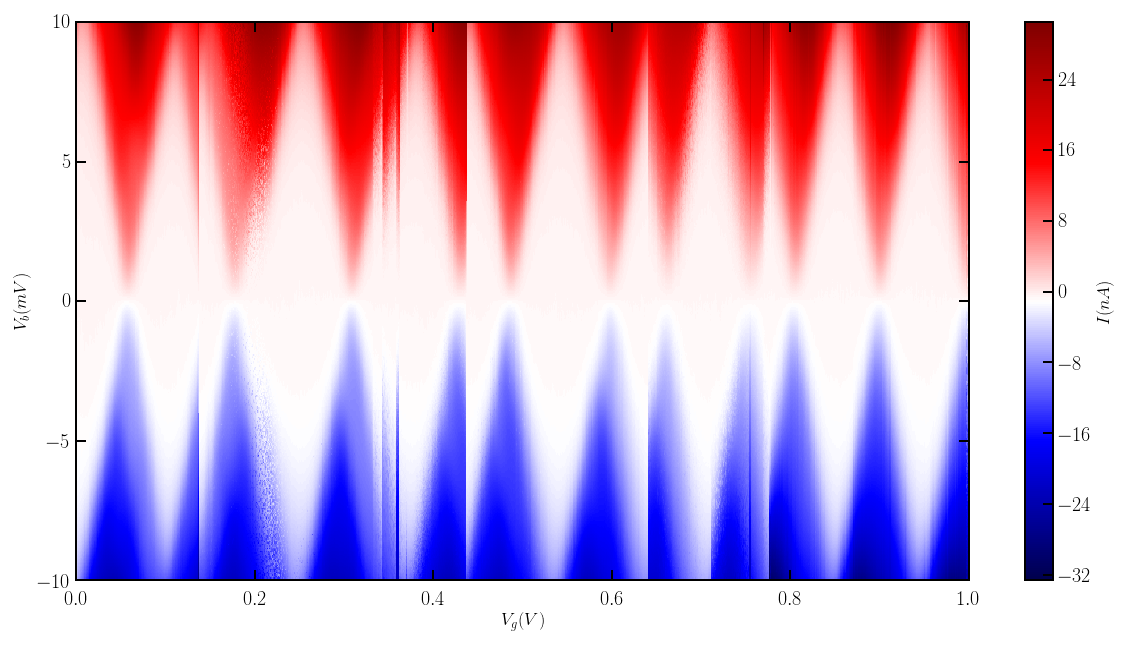

In [144]:
f = os.path.join(data_dir,'VI-gate_17-19_13_f.bin')
df = lvdt.get_data_3d(f)
df = df.groupby(df.index).mean()
df.index = df.index*1000

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
limits = [df.columns[0], df.columns[-1],df.index[0],df.index[-1]]
im = ax.imshow(df*1e9+0.0, extent = limits, 
               cmap = plt.cm.seismic,
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
cb = plt.colorbar(im)
cb.set_label(r'$I (nA)$')
# fig.savefig(os.path.join(fig_dir,'VI-gate_17-19_13_f.pdf'), format='pdf', dpi=300)

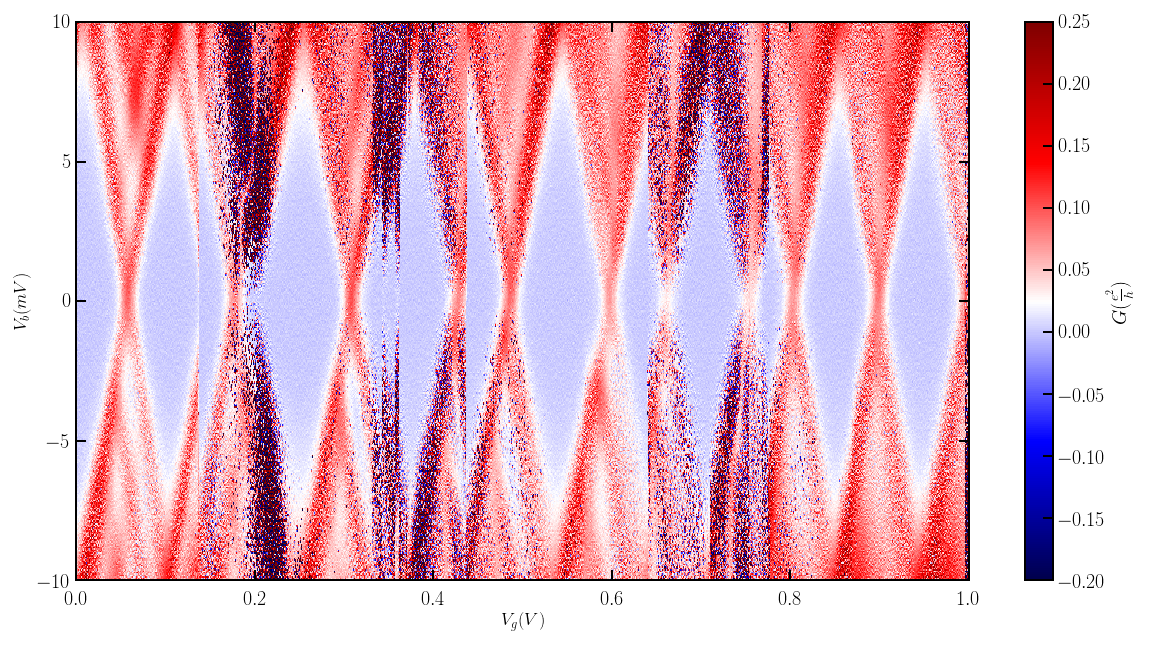

In [142]:
cond = df.diff()/50e-6/3.875e-5

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
limits = [cond.columns[0], cond.columns[-1],cond.index[0],cond.index[-1]]
im = ax.imshow(cond, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.2, vmax = 0.25, 
               origin = 'lower', aspect = 'auto', interpolation = 'None')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
# ax.set_title('B=0T')
cb = plt.colorbar(im)
cb.set_label(r'$G (\frac{e^2}{h})$', fontsize=20)

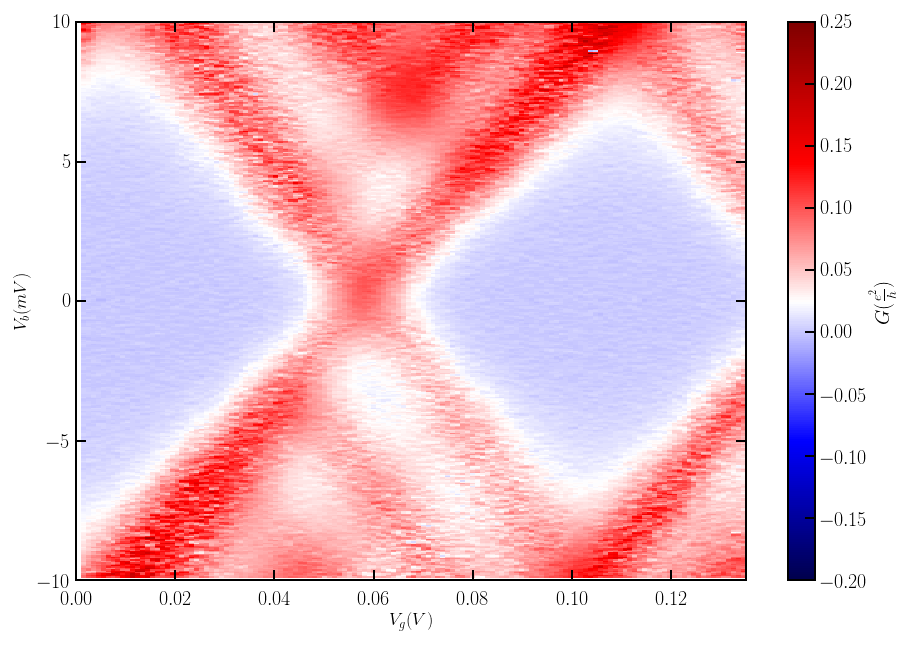

In [143]:
# looking at just that first diamond near zero gate with some averaging

cond_roll = pd.rolling_mean(cond, 2, axis=1)
cond_roll = pd.rolling_mean(cond_roll, 2, axis=0)

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,1,1)
limits = [0, 0.135,cond.index[0],cond.index[-1]]
im = ax.imshow(cond_roll.loc[limits[2]:limits[3],limits[0]:limits[1]], extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.2, vmax = 0.25, 
               origin = 'lower', aspect = 'auto', interpolation = 'None')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
# ax.set_title('B=0T')
cb = plt.colorbar(im)
cb.set_label(r'$G (\frac{e^2}{h})$', fontsize=20)

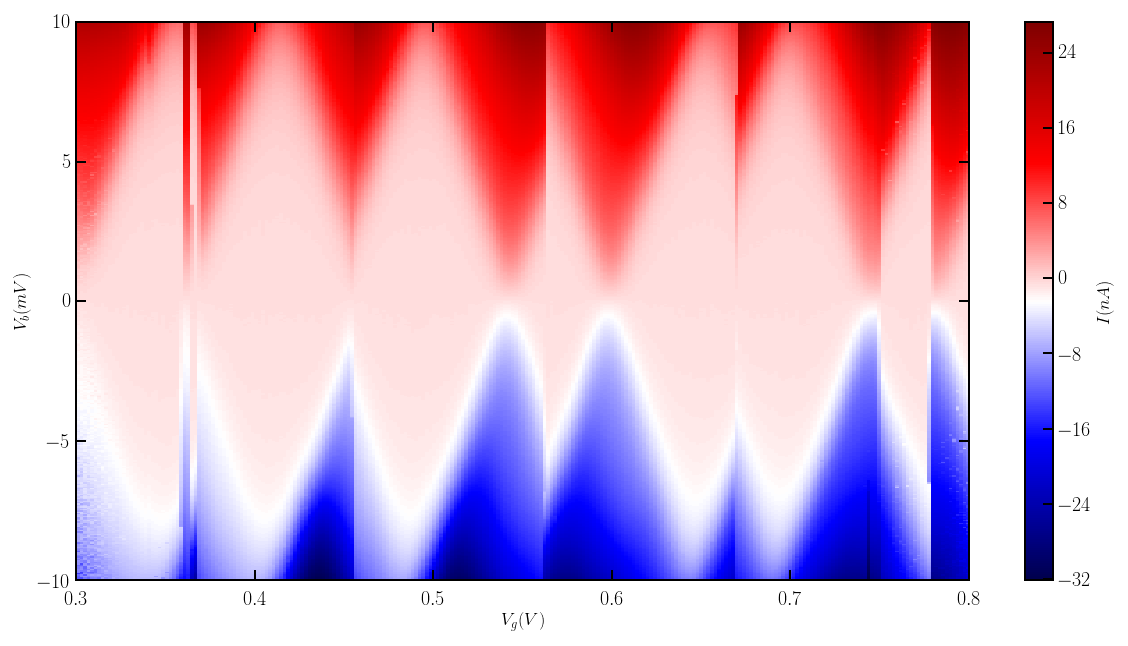

In [150]:
# a second scan in the same region

f = os.path.join(data_dir,'VI-gate_17-19_13_g.bin')
df = lvdt.get_data_3d(f)
df = df.groupby(df.index).mean()
df.index = df.index*1000

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
limits = [df.columns[0], df.columns[-1],df.index[0],df.index[-1]]
im = ax.imshow(df*1e9+0.0, extent = limits, 
               cmap = plt.cm.seismic,
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
cb = plt.colorbar(im)
cb.set_label(r'$I (nA)$')
# fig.savefig(os.path.join(fig_dir,'VI-gate_17-19_13_f.pdf'), format='pdf', dpi=300)

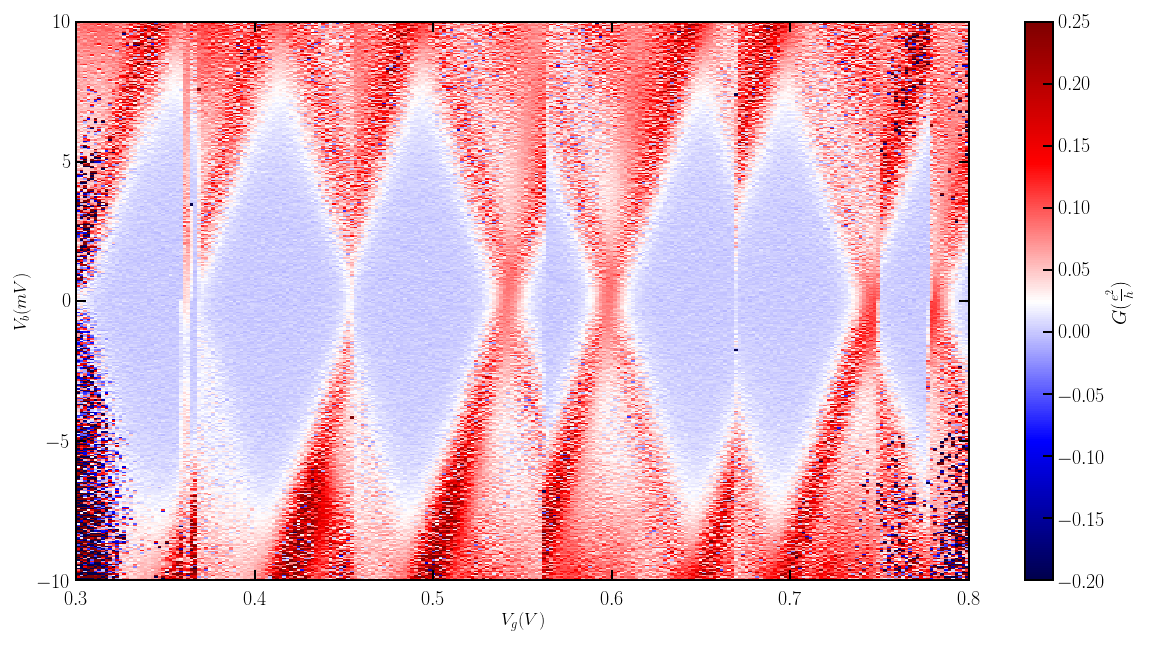

In [151]:
cond = df.diff()/50e-6/3.875e-5

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
limits = [cond.columns[0], cond.columns[-1],cond.index[0],cond.index[-1]]
im = ax.imshow(cond, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.2, vmax = 0.25, 
               origin = 'lower', aspect = 'auto', interpolation = 'None')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
# ax.set_title('B=0T')
cb = plt.colorbar(im)
cb.set_label(r'$G (\frac{e^2}{h})$')

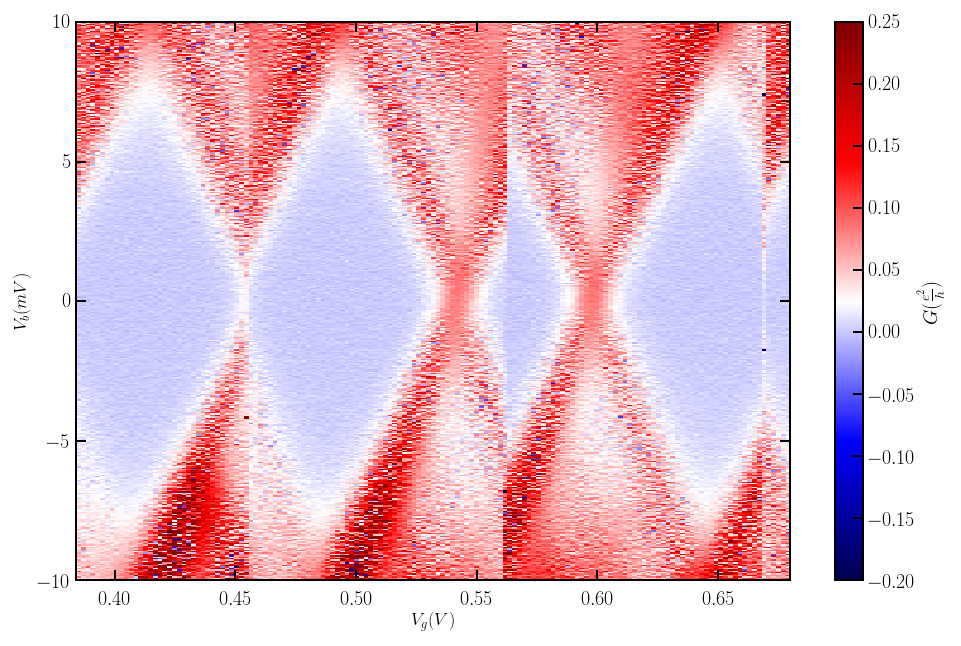

In [152]:
# and a subplot of that

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(1,1,1)
limits = [0.384,0.68,cond.index[0],cond.index[-1]]
im = ax.imshow(cond.loc[limits[2]:limits[3],limits[0]:limits[1]], extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.2, vmax = 0.25, 
               origin = 'lower', aspect = 'auto', interpolation = 'None')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
# ax.set_title('B=0T')
cb = plt.colorbar(im)
cb.set_label(r'$G (\frac{e^2}{h})$', fontsize=20)

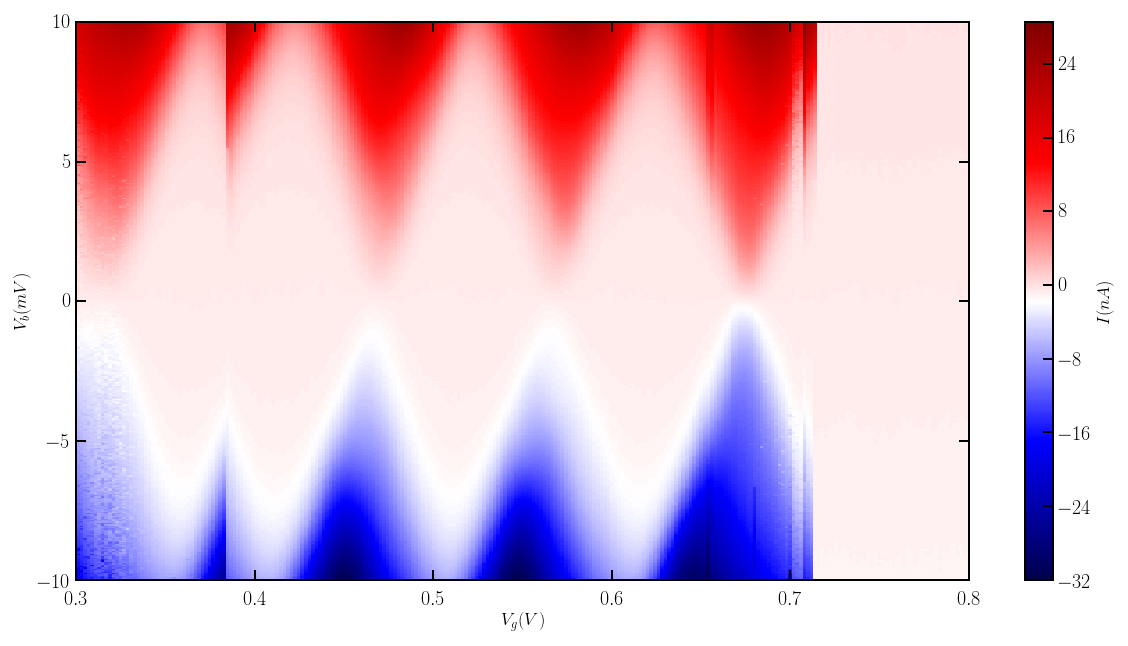

In [153]:
# here is a similar plot at -4T

f = os.path.join(data_dir,'VI-gate_17-19_13_g_n4T.bin')
df = lvdt.get_data_3d(f)
df = df.groupby(df.index).mean()
df.index = df.index*1000

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
limits = [df.columns[0], df.columns[-1],df.index[0],df.index[-1]]
im = ax.imshow(df*1e9+0.0, extent = limits, 
               cmap = plt.cm.seismic,
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
cb = plt.colorbar(im)
cb.set_label(r'$I (nA)$')
# fig.savefig(os.path.join(fig_dir,'VI-gate_17-19_13_f.pdf'), format='pdf', dpi=300)

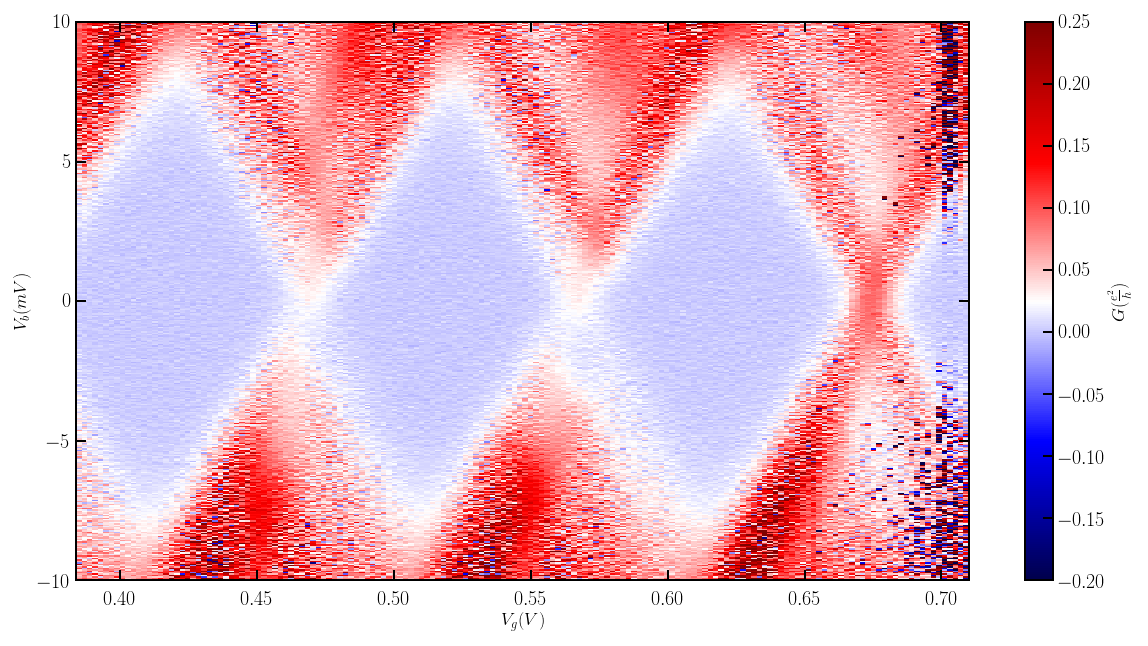

In [157]:
# look at the conductance in the good parts
cond = df.diff()/50e-6/3.875e-5

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
limits = [0.384, 0.71,cond.index[0],cond.index[-1]]
im = ax.imshow(cond.loc[limits[2]:limits[3],limits[0]:limits[1]], extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.2, vmax = 0.25, 
               origin = 'lower', aspect = 'auto', interpolation = 'None')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
# ax.set_title('B=-4T')
cb = plt.colorbar(im)
cb.set_label(r'$G (\frac{e^2}{h})$')

In [197]:
# Finally the MR data
# these are all of the data sets that look good

filelist = ['BI_17-19_13_c.bin', 'BI_17-19_13_d.bin', 'BI_17-19_13_e.bin', 'BI_17-19_13_i.bin']
filelist = [os.path.join(data_dir, f) for f in filelist]

In [198]:
def get_bias_gate(header):
    bias = 0.0
    gate = 0.0
    for i,line in enumerate(header):
        if line[0] == 'Bias Output Options':
            bias = float(header[i+5][1])
        if line[0] == 'Gate Output Options':
            gate = float(header[i+5][1])
    return bias, gate

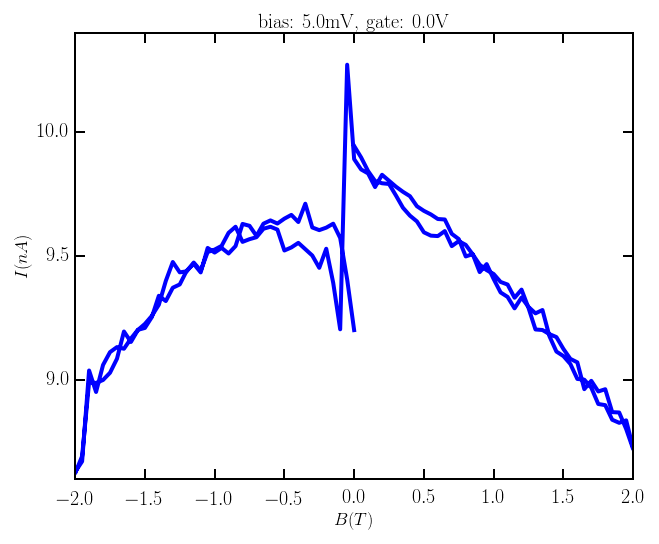

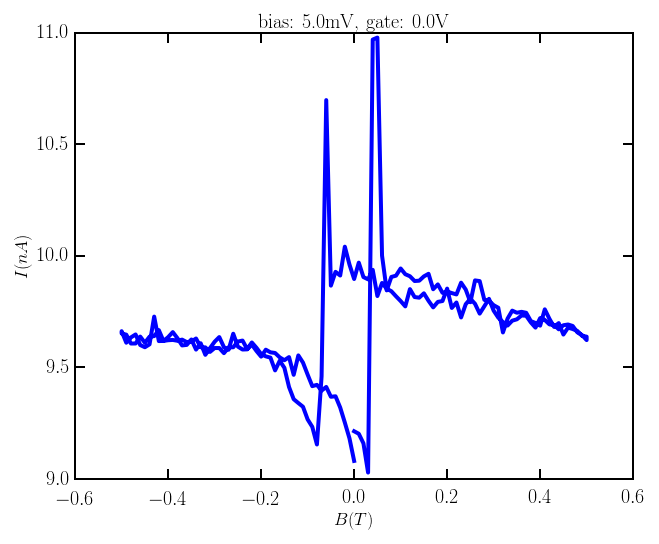

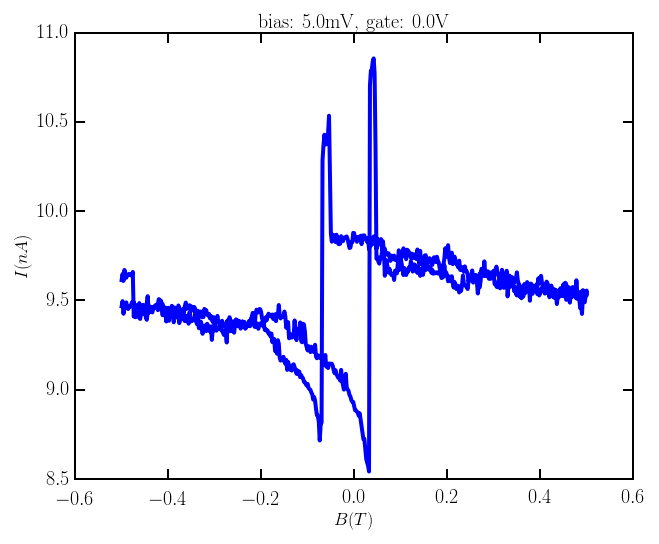

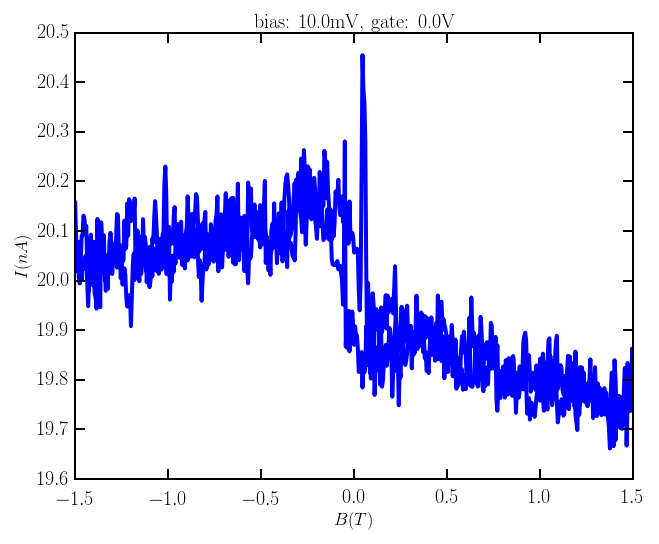

In [202]:
for f in filelist:
    bias, gate = get_bias_gate(lvdt.get_txt(f))
    df = lvdt.get_data_2d(f)
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(df['Field'], df['Iavg']*1e9)
    ax.set_xlabel(r'$B (T)$')
    ax.set_ylabel(r'$I (nA)$')
    ax.set_title('bias: {0}mV, gate: {1}V'.format(bias*1000, gate))